In [1]:
import pandas as pd
import pymysql

In [2]:
# mysql에 연결
conn = pymysql.connect(host='localhost', user='root',
                       password='2018',
                       db='immigrant_project', charset='utf8')

In [3]:
# cursor 객체 생성
curs = conn.cursor()

In [4]:
curs.execute("""select cbr.범죄별1, cbr.시점, cbr.발생지역별, cbr.데이터
from crime_by_region cbr 
	inner join city_population cp 
		on (cp.소재지, cp.시점) = (cbr.발생지역별, cbr.시점)
where (cbr.범죄별1 = 'A/Bⅹ100,000 (건/10만명)') & (cbr.시점 > 2014)""")
result = curs.fetchall()
queryDF1 = pd.DataFrame(result)
queryDF1

,0,1,2,3
0,"A/Bⅹ100,000 (건/10만명)",2015,전국,3922.0
1,"A/Bⅹ100,000 (건/10만명)",2015,서울,3856.0
2,"A/Bⅹ100,000 (건/10만명)",2015,부산,4453.0
3,"A/Bⅹ100,000 (건/10만명)",2015,대구,4330.0
4,"A/Bⅹ100,000 (건/10만명)",2015,인천,3767.0
...,...,...,...,...
139,"A/Bⅹ100,000 (건/10만명)",2022,전북,3036.7
140,"A/Bⅹ100,000 (건/10만명)",2022,전남,3385.9
141,"A/Bⅹ100,000 (건/10만명)",2022,경북,3036.1
142,"A/Bⅹ100,000 (건/10만명)",2022,경남,3398.5


In [5]:
# 헤더 정보 가져오기 (tuple형식으로 [0]번째 인덱스에 헤더 정보 포함)
desc = curs.description
desc

(('범죄별1', 253, None, 200, 200, 0, True),
 ('시점', 3, None, 11, 11, 0, True),
 ('발생지역별', 253, None, 200, 200, 0, True),
 ('데이터', 5, None, 22, 22, 31, True))

In [6]:
[r[0] for r in desc]

['범죄별1', '시점', '발생지역별', '데이터']

In [7]:
queryDF1.columns = [r[0] for r in desc]
queryDF1

,범죄별1,시점,발생지역별,데이터
0,"A/Bⅹ100,000 (건/10만명)",2015,전국,3922.0
1,"A/Bⅹ100,000 (건/10만명)",2015,서울,3856.0
2,"A/Bⅹ100,000 (건/10만명)",2015,부산,4453.0
3,"A/Bⅹ100,000 (건/10만명)",2015,대구,4330.0
4,"A/Bⅹ100,000 (건/10만명)",2015,인천,3767.0
...,...,...,...,...
139,"A/Bⅹ100,000 (건/10만명)",2022,전북,3036.7
140,"A/Bⅹ100,000 (건/10만명)",2022,전남,3385.9
141,"A/Bⅹ100,000 (건/10만명)",2022,경북,3036.1
142,"A/Bⅹ100,000 (건/10만명)",2022,경남,3398.5


In [8]:
queryDF1 = queryDF1.sort_values(['발생지역별', '시점'])

In [9]:
queryDF1

,범죄별1,시점,발생지역별,데이터
10,"A/Bⅹ100,000 (건/10만명)",2015,강원,4081.0
28,"A/Bⅹ100,000 (건/10만명)",2016,강원,4177.2
46,"A/Bⅹ100,000 (건/10만명)",2017,강원,3799.7
64,"A/Bⅹ100,000 (건/10만명)",2018,강원,3402.0
82,"A/Bⅹ100,000 (건/10만명)",2019,강원,3457.0
...,...,...,...,...
65,"A/Bⅹ100,000 (건/10만명)",2018,충북,3355.3
83,"A/Bⅹ100,000 (건/10만명)",2019,충북,3362.5
101,"A/Bⅹ100,000 (건/10만명)",2020,충북,3226.1
119,"A/Bⅹ100,000 (건/10만명)",2021,충북,2943.5


In [10]:
queryDF1.reset_index(drop=True, inplace=True)

In [11]:
queryDF1

,범죄별1,시점,발생지역별,데이터
0,"A/Bⅹ100,000 (건/10만명)",2015,강원,4081.0
1,"A/Bⅹ100,000 (건/10만명)",2016,강원,4177.2
2,"A/Bⅹ100,000 (건/10만명)",2017,강원,3799.7
3,"A/Bⅹ100,000 (건/10만명)",2018,강원,3402.0
4,"A/Bⅹ100,000 (건/10만명)",2019,강원,3457.0
...,...,...,...,...
139,"A/Bⅹ100,000 (건/10만명)",2018,충북,3355.3
140,"A/Bⅹ100,000 (건/10만명)",2019,충북,3362.5
141,"A/Bⅹ100,000 (건/10만명)",2020,충북,3226.1
142,"A/Bⅹ100,000 (건/10만명)",2021,충북,2943.5


In [12]:
curs.execute("""select fd.행정구역별, fd.시점, fd.거주외국인별1, fd.합계, cp.전체인구,
		fd.합계 / cp.전체인구 as 귀화자비율
from city_population cp 
	inner join foreign_distribution fd 
		on (cp.소재지, cp.시점) = (fd.행정구역별, fd.시점)
where (fd.거주외국인별1 = '한국국적을 취득한 자 (명)') & (fd.거주외국인별2 = '소계')""")
result = curs.fetchall()
queryDF2 = pd.DataFrame(result)
queryDF2

,0,1,2,3,4,5
0,전국,2015,한국국적을 취득한 자 (명),149751,51529338,0.0029
1,전국,2016,한국국적을 취득한 자 (명),159447,51696216,0.0031
2,전국,2017,한국국적을 취득한 자 (명),169535,51778544,0.0033
3,전국,2018,한국국적을 취득한 자 (명),176915,51826059,0.0034
4,전국,2019,한국국적을 취득한 자 (명),185728,51849861,0.0036
...,...,...,...,...,...,...
139,제주,2018,한국국적을 취득한 자 (명),1888,667191,0.0028
140,제주,2019,한국국적을 취득한 자 (명),2112,670989,0.0031
141,제주,2020,한국국적을 취득한 자 (명),2320,674635,0.0034
142,제주,2021,한국국적을 취득한 자 (명),2468,676759,0.0036


In [13]:
# 헤더 정보 가져오기 (tuple형식으로 [0]번째 인덱스에 헤더 정보 포함)
desc = curs.description
desc

(('행정구역별', 253, None, 200, 200, 0, True),
 ('시점', 3, None, 11, 11, 0, True),
 ('거주외국인별1', 253, None, 200, 200, 0, True),
 ('합계', 3, None, 11, 11, 0, True),
 ('전체인구', 3, None, 11, 11, 0, True),
 ('귀화자비율', 246, None, 16, 16, 4, True))

In [14]:
queryDF2.columns = [r[0] for r in desc]
queryDF2

,행정구역별,시점,거주외국인별1,합계,전체인구,귀화자비율
0,전국,2015,한국국적을 취득한 자 (명),149751,51529338,0.0029
1,전국,2016,한국국적을 취득한 자 (명),159447,51696216,0.0031
2,전국,2017,한국국적을 취득한 자 (명),169535,51778544,0.0033
3,전국,2018,한국국적을 취득한 자 (명),176915,51826059,0.0034
4,전국,2019,한국국적을 취득한 자 (명),185728,51849861,0.0036
...,...,...,...,...,...,...
139,제주,2018,한국국적을 취득한 자 (명),1888,667191,0.0028
140,제주,2019,한국국적을 취득한 자 (명),2112,670989,0.0031
141,제주,2020,한국국적을 취득한 자 (명),2320,674635,0.0034
142,제주,2021,한국국적을 취득한 자 (명),2468,676759,0.0036


In [15]:
queryDF2 = queryDF2.sort_values(['행정구역별', '시점'])

In [16]:
queryDF2['귀화자비율'] = queryDF2['귀화자비율'].astype('float64')

In [17]:
queryDF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 80 to 95
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역별    144 non-null    object 
 1   시점       144 non-null    int64  
 2   거주외국인별1  144 non-null    object 
 3   합계       144 non-null    int64  
 4   전체인구     144 non-null    int64  
 5   귀화자비율    144 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.9+ KB


In [18]:
queryDF2.reset_index(drop=True, inplace=True)
queryDF2

,행정구역별,시점,거주외국인별1,합계,전체인구,귀화자비율
0,강원,2015,한국국적을 취득한 자 (명),2905,1549507,0.0019
1,강원,2016,한국국적을 취득한 자 (명),3221,1550806,0.0021
2,강원,2017,한국국적을 취득한 자 (명),3451,1550142,0.0022
3,강원,2018,한국국적을 취득한 자 (명),3567,1543052,0.0023
4,강원,2019,한국국적을 취득한 자 (명),3786,1541502,0.0025
...,...,...,...,...,...,...
139,충북,2018,한국국적을 취득한 자 (명),5112,1599252,0.0032
140,충북,2019,한국국적을 취득한 자 (명),5382,1600007,0.0034
141,충북,2020,한국국적을 취득한 자 (명),5816,1600837,0.0036
142,충북,2021,한국국적을 취득한 자 (명),6212,1597427,0.0039


In [19]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

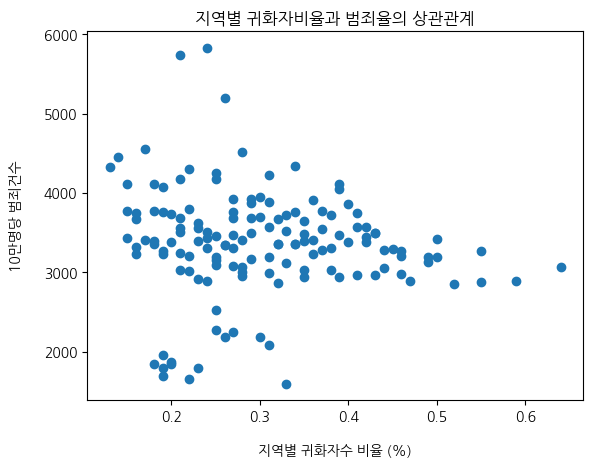

In [38]:
plt.title('지역별 귀화자비율과 범죄율의 상관관계')
plt.scatter(queryDF2['귀화자비율'] * 100, queryDF1['데이터'])
plt.xlabel('지역별 귀화자수 비율 (%)', labelpad=15)
plt.ylabel('10만명당 범죄건수', labelpad=15)
plt.show()

In [21]:
import numpy as np
X = [1, 2, 3]
Y = [1, 2, 1]
np.corrcoef(X, Y)

array([[1., 0.],
       [0., 1.]])

In [22]:
queryDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정구역별    144 non-null    object 
 1   시점       144 non-null    int64  
 2   거주외국인별1  144 non-null    object 
 3   합계       144 non-null    int64  
 4   전체인구     144 non-null    int64  
 5   귀화자비율    144 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.9+ KB


In [23]:
queryDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   범죄별1    144 non-null    object 
 1   시점      144 non-null    int64  
 2   발생지역별   144 non-null    object 
 3   데이터     144 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ KB


In [24]:
queryDF1['데이터']

0      4081.0
1      4177.2
2      3799.7
3      3402.0
4      3457.0
        ...  
139    3355.3
140    3362.5
141    3226.1
142    2943.5
143    2966.9
Name: 데이터, Length: 144, dtype: float64

In [28]:
# 상관관계 : -0.088 (관계 없음에 수렴)
np.corrcoef(list(queryDF2['귀화자비율']), list(queryDF1['데이터']))[0, 1]

-0.0881178687712835